# Además, debe optimizar los siguientes hiperparámetros: hidden_layer_sizes, activation, max_iter, learning_rate_init.

In [1]:
import pandas as pd #se uara para abrir el dataframe que se guardo como csv
#Las siguientes librerias de skelarn se usan para hacer el entrenamiento del ANN ademas que la optimizacion de los datos
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np #se usar apara dar comportamiento en la optmizaciond e datos

In [2]:
DataFrameLatidos = pd.read_csv('C:/Users/andre/Downloads/content/DataFramelatidos.csv')#Abre el csv que contiene los datos que extrajimos en el documento anterior

In [3]:
#DataFrameLatidos# se abre del dataset

In [4]:
#Las condiciones del documento es, hacer un total de 400k muestras para el entrenamiento, por lo cual obtendremos 1/3 de los 400k de los datos, que se consideran latidos 
DataFrameLatidos1=DataFrameLatidos.loc[DataFrameLatidos["Outcome"]==1] 
DataFrameLatidos1=DataFrameLatidos1.reset_index(drop=True)
DataFrameLatidos1.loc[0:13334]

,Media,Mediana,Mediana Alta,Moda,Kurtosis,Desviacion Estandar,Outcome
0,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
1,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
2,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
3,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
4,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
...,...,...,...,...,...,...,...
13330,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
13331,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
13332,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
13333,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1


In [5]:
#como ya obtuvimos 1/3 de los 400k de los datos como latidos, usaremos un total de 2/3 para los no latidos
DataFrameLatidos0=DataFrameLatidos.loc[DataFrameLatidos["Outcome"]==0] 

DataFrameLatidos0=DataFrameLatidos0.reset_index(drop=True)
DataFrameLatidos0.loc[0:266667]


,Media,Mediana,Mediana Alta,Moda,Kurtosis,Desviacion Estandar,Outcome
0,-0.1145,-0.115,-0.115,-0.175,0.065915,0.065915,0
1,-0.1230,-0.140,-0.135,-0.175,0.072153,0.072153,0
2,-0.1480,-0.145,-0.145,-0.145,0.081860,0.081860,0
3,-0.1580,-0.170,-0.165,-0.175,0.059674,0.059674,0
4,-0.1145,-0.115,-0.115,-0.175,0.065915,0.065915,0
...,...,...,...,...,...,...,...
266663,-0.0115,-0.015,-0.015,-0.015,0.053691,0.053691,0
266664,-0.1315,-0.150,-0.145,-0.285,0.132374,0.132374,0
266665,-0.0195,-0.015,-0.015,-0.015,0.061925,0.061925,0
266666,-0.1160,-0.135,-0.125,-0.285,0.126842,0.126842,0


In [6]:
#Fusionamos ambos resultados para obtener un dataframe de 400k como es solicitado en el parcial
DataFrameMuestra=DataFrameLatidos1.loc[0:133334].append( DataFrameLatidos0.loc[0:266667])
DataFrameMuestra

C:\Users\andre\AppData\Local\Temp\ipykernel_4892\3113774640.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DataFrameMuestra=DataFrameLatidos1.loc[0:133334].append( DataFrameLatidos0.loc[0:266667])


,Media,Mediana,Mediana Alta,Moda,Kurtosis,Desviacion Estandar,Outcome
0,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
1,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
2,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
3,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
4,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609,1
...,...,...,...,...,...,...,...
266663,-0.0115,-0.015,-0.015,-0.015,0.053691,0.053691,0
266664,-0.1315,-0.150,-0.145,-0.285,0.132374,0.132374,0
266665,-0.0195,-0.015,-0.015,-0.015,0.061925,0.061925,0
266666,-0.1160,-0.135,-0.125,-0.285,0.126842,0.126842,0


In [7]:
# como el entrenamiento se debe hacer de forma adecuada, se hace una limpieza de los datos por medio de los cuartiles para asi lograr una buena ejecucion del entrenamiento
for i in DataFrameMuestra.columns[0:-1]: # se recorren todas las filas del dataframe, hasta la columna de desviaciom, dado que la columna de outcome es imposible que sea atipico
    try:# se usa un trycath en caso que ocurre un error de los cuartiles
  #print(datosDeCancerCopia)
  #print(i)
        q1 = np.percentile(DataFrameMuestra[i], 30, #se obtiene el 1 cuartil de la columna i
                   interpolation  = 'midpoint')
        q3 = np.percentile(DataFrameMuestra[i], 70, #Se obtiene el 3 cuartil de la colunta i
                   interpolation  = 'midpoint')
        iqr=q3-q1 #Se encuentra el rango intercuartilico

      #upper = np.where(datosDeCancerCopia[i] >= (q3 + 1.5 * iqr))

      #lower = np.where(datosDeCancerCopia[i] <= (q1 - 1.5 * iqr))
      #fence_low  = q1-3*iqr
      #fence_high = q3+3*iqr
      #datosDeCancerCopia = datosDeCancerCopia.loc[(datosDeCancerCopia[i] > fence_low) & (datosDeCancerCopia[i] < fence_high)]

        upper = np.where(DataFrameMuestra[i] >= (q3 + (1.5 * iqr))) # se encuentra los datos que superan el rango superior del cuartil

        lower = np.where(DataFrameMuestra[i] <= (q1 - (1.5 * iqr))) # se encuentra los datos inferiores al rango ingerior del cuartil
      #print(upper)
      #print(lower)

        for j in upper[0]:# se recorre la lista de datos superiores y se eliminan del datset
        #print(j)
            DataFrameMuestra[i].drop(j, inplace = True)

        for j in lower[0]:#Se recorre la lista de datos inferiores y se elimina del dataset
            DataFrameMuestra[i].drop(j, inplace = True)
        DataFrameMuestra[i].reset_index(drop=True, inplace=True)#Se reinicia los
    except:
        continue
DataFrameMuestra = DataFrameMuestra.dropna()

In [8]:
x=DataFrameMuestra[["Media","Mediana","Mediana Alta","Moda","Kurtosis","Desviacion Estandar"]] #Obtiene los datos que se usan para entrenar la IA
y=DataFrameMuestra[["Outcome"]] #Se obtiene el resultado de esos datos

In [9]:
x #se muesta los datos de entrenamiento

,Media,Mediana,Mediana Alta,Moda,Kurtosis,Desviacion Estandar
0,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609
1,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609
2,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609
3,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609
4,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609
...,...,...,...,...,...,...
266663,-0.0115,-0.015,-0.015,-0.015,0.053691,0.053691
266664,-0.1315,-0.150,-0.145,-0.285,0.132374,0.132374
266665,-0.0195,-0.015,-0.015,-0.015,0.061925,0.061925
266666,-0.1160,-0.135,-0.125,-0.285,0.126842,0.126842


In [10]:
y #se muestra la salida de estos datos

,Outcome
0,1
1,1
2,1
3,1
4,1
...,...
266663,0
266664,0
266665,0
266666,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y,train_size=0.7) # se preparan los datos de entrenamiento y los de test
print(len(X_train))
mlp_gs = MLPClassifier(max_iter=100)#se crea para la cantidad de iteraciones del entrenamiento que vamos a usar


280002


In [12]:
parameters = { #estos parametros se usan para poder obtener  una manera obtima en los 4 apartados, estos son los que nosotros pensamos que son ideales, pero a continuacuon se mostrara que el codigo resolvera y econtrara cuales son los mas ideales
    'hidden_layer_sizes':[(20),(10,50)], #tamaño de hiden layyes, cuantos nodos tendra y las opciones del mismo que le datemos
    'activation':[ 'tanh', 'relu'], #La fucnion de activacion que  usara
    'learning_rate_init':np.arange(0.001,0.005), #La curva de aprendizaje que alicara para el entrenamiento
    'tol':np.arange(0.001,0.005,0.001) #Nivel de tolerancia

}
clf = GridSearchCV(mlp_gs,parameters,cv=5) #Se crea el modulo con los datos que se creen adecuados

clf.fit(X_train, y_train.values.ravel())#se añade el entrenamiento y atravez de iteraciones se obtendra la configuracion ideal para la IA


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [20, (10, 50)],
                         'learning_rate_init': array([0.001]),
                         'tol': array([0.001, 0.002, 0.003, 0.004])})

In [13]:
clf.cv_results_ #resiltados de la optimizacion de hiperparametros

{'mean_fit_time': array([22.04315333, 22.39742489, 18.3941186 , 15.27142744, 25.59626818,
        23.75057235, 22.67771544, 24.24426556, 24.3144546 , 18.24624696,
        20.13193588, 24.38385673, 24.99152756, 26.46436343, 25.00025244,
        26.61272559]),
 'std_fit_time': array([0.9501373 , 2.17007977, 2.57002703, 0.75150873, 1.17305835,
        1.29094221, 0.91642236, 0.96459464, 3.82424883, 4.83450606,
        2.11312325, 7.6054217 , 2.14451936, 3.27869375, 1.32179459,
        8.84831254]),
 'mean_score_time': array([0.03616486, 0.03920856, 0.03211551, 0.02594738, 0.09590178,
        0.09098949, 0.0862977 , 0.08581648, 0.04187946, 0.03968101,
        0.05025907, 0.03849187, 0.07969236, 0.09145889, 0.08726835,
        0.07913828]),
 'std_score_time': array([0.00808904, 0.00431142, 0.00706348, 0.00372662, 0.0151664 ,
        0.00524054, 0.01474872, 0.00891134, 0.01137216, 0.00471099,
        0.01370357, 0.00905203, 0.00459709, 0.00217976, 0.00545973,
        0.01234646]),
 'param_ac

In [14]:
clf.best_estimator_ #Se le da los mejores estimadores para la IA

MLPClassifier(activation='tanh', hidden_layer_sizes=20, max_iter=100, tol=0.001)

In [15]:
clf.best_params_ #se dan los mejores parametros para la IA

{'activation': 'tanh',
 'hidden_layer_sizes': 20,
 'learning_rate_init': 0.001,
 'tol': 0.001}

# Desempeño objetivo: 0.85

In [16]:
clf.score(X_test, y_test) #Se obtiene el resultado de usar los datos de prueba para la IA

1.0

# Con las características de configuración de la red neuronal formada en el anterior segmento. Aplicar dicha red sobre una ventana deslizante, graficar la salida de esta red y compararla con la señal de ECG.

In [17]:
#Se obviara la explicacion de los siguientes 3 bloques de codigo dado que es mismo proceso que se hizo en el documento anterior
import os
listaContenido= os.listdir("C:/Users/andre/Downloads/content/") 
listaContenido.sort()
listaDatos=[]
listaatr=[]
listaxws=[]
listahea=[]
listadat=[]

In [18]:
for i in listaContenido:
  if i.__contains__(".atr"):
    listaDatos.append(i.replace(".atr",""))
    listaatr.append(i)
  elif i.__contains__(".xws"):
    listaxws.append(i)
  elif i.__contains__(".hea"):
    listahea.append(i)
  elif i.__contains__(".dat"):
    listadat.append(i)   

print(listaDatos)
print(listaatr)
print(listaxws)
print(listahea)
print(listadat)

['16265', '16272', '16273', '16420', '16483', '16539', '16773', '16786', '16795', '17052', '17453', '18177', '18184', '19088', '19090', '19093', '19140', '19830']
['16265.atr', '16272.atr', '16273.atr', '16420.atr', '16483.atr', '16539.atr', '16773.atr', '16786.atr', '16795.atr', '17052.atr', '17453.atr', '18177.atr', '18184.atr', '19088.atr', '19090.atr', '19093.atr', '19140.atr', '19830.atr']
['16265.xws', '16272.xws', '16273.xws', '16420.xws', '16483.xws', '16539.xws', '16773.xws', '16786.xws', '16795.xws', '17052.xws', '17453.xws', '18177.xws', '18184.xws', '19088.xws', '19090.xws', '19093.xws', '19140.xws', '19830.xws']
['16265.hea', '16272.hea', '16273.hea', '16420.hea', '16483.hea', '16539.hea', '16773.hea', '16786.hea', '16795.hea', '17052.hea', '17453.hea', '18177.hea', '18184.hea', '19088.hea', '19090.hea', '19093.hea', '19140.hea', '19830.hea']
['16265.dat', '16272.dat', '16273.dat', '16420.dat', '16483.dat', '16539.dat', '16773.dat', '16786.dat', '16795.dat', '17052.dat', '

In [19]:
import wfdb
pepito=wfdb.rdrecord("C:/Users/andre/Downloads/content/" +listaDatos[0])

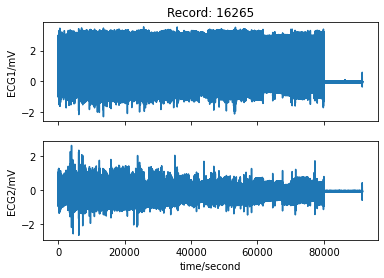

In [20]:

wfdb.plot_wfdb(pepito)

In [21]:
#clf.predict(X_test)[0:100]
X_test #se explora as o menos como esta el data set, para asi saber que datos necesitaremos de la ventan deslizante para asi observar como lo compararemos en la prediccion

,Media,Mediana,Mediana Alta,Moda,Kurtosis,Desviacion Estandar
46328,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609
5550,-0.1525,-0.165,-0.165,-0.175,0.041337,0.041337
249302,-0.1315,-0.150,-0.145,-0.285,0.132374,0.132374
17665,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609
98888,-0.1565,-0.165,-0.165,-0.175,0.059605,0.059605
...,...,...,...,...,...,...
233362,-0.0760,-0.020,-0.015,-0.015,0.109083,0.109083
166957,0.0265,0.040,0.045,0.005,0.078567,0.078567
84088,-0.1075,-0.115,-0.115,-0.145,0.057609,0.057609
198424,-0.0045,-0.010,-0.005,-0.015,0.044099,0.044099


In [22]:
import statistics
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat
from scipy import stats as s
ListaDatos=[] #datos que se usaran en el entrenamiento
signal0=pepito.p_signal[:,0]



lista=[] #vector que se usara para comenzar a trabbajar la ventana deslizante
cont=0
primera=0
#lista=[1,2,3,4,5,6,7,8,9,10]
#print(lista[5:])

#Al igual que en codigo anteriores, exploraremos la señal y sacaremos los datos para asi pasarlo a la prediccion, pero esta vez no en toda la señal, si no que en una muestra de 100000 de datos, para asi evitar tener que trabajar datos de mas si vemos el patron en si
print(len(signal0))
for i in signal0[:1000000]:
    lista.append(i) #se comienza a añdir la ventana deslizante 
    
    
    if len(lista)==20:#si la ventana obitne un total de 20 datos, se sacan las medidas de dichos datos en esa ventan, para asi poder sacar sus metricas, ademas que, en caso tal, cuando se obtenga todo, reducimos la lista hasta 10 datos, y añadiremos otro 10, con tal de simular una ventana desliznate con paso de 10
        media=float(np.mean(lista))
            
        moda=float(s.mode(lista)[0])
            
        mediana=float(np.median(lista))
        medianaAlta=float(statistics.median_high(lista))
        kurtosis=np.std(lista)
            
        Desviacion=statistics.pstdev(lista)
        
        filaLatido=[media,mediana,medianaAlta,moda,kurtosis,Desviacion]
        #print(filaLatido)
        if primera==0:
            for j in range(0,20):
                ListaDatos.append(filaLatido)
            primera=1
        else:
            for j in range(0,10):
                ListaDatos.append(filaLatido)
            primera=1
            
        lista=lista[10:]
    #print(cont)
    cont+=1
        
    
    
    
    

11730944


In [23]:
resultado=clf.predict(ListaDatos) # se hace las predicciones de la IA con la lista de datos de la lista de señales en la posicion 0

C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [24]:
DataFrameResultado= pd.DataFrame(resultado, columns =["Salida"])# se hace un dataframe con los resultados, dado que, tenemos que evitar que se cree un plot donde solo exita 2 coilumnas, una de 1 y 0
DataFrameResultado

,Salida
0,1
1,1
2,1
3,1
4,1
...,...
999995,0
999996,0
999997,0
999998,0


<AxesSubplot:>

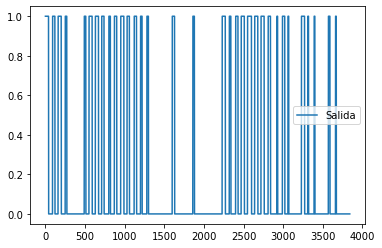

In [25]:
DataFrameResultado.loc[:3840].plot()# se grafica el resultado de la prediccion

<AxesSubplot:>

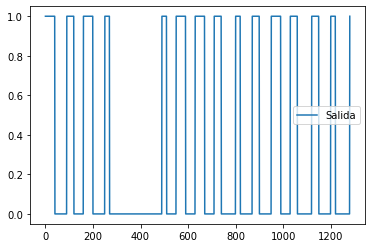

In [26]:
DataFrameResultado.loc[:1280].plot()#se vuelvea graficar pero en menor medida

In [27]:

DataFrameSeñal0= pd.DataFrame(signal0[:1000000], columns =["Salida"]) #se crea un dataframe con la señal

<AxesSubplot:>

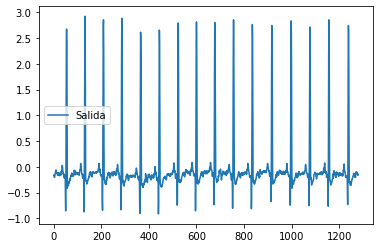

In [28]:
DataFrameSeñal0.loc[:1280].plot()#Se grafica la señal

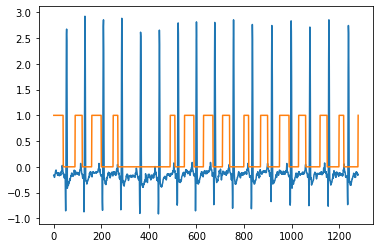

In [29]:
#Se grafica la señal y la prediccion en un solo, para asi poder observar como responde la prediccion a ala señal
plt.plot(DataFrameSeñal0.loc[:1280])
plt.plot(DataFrameResultado.loc[:1280])

# Desde este punto se repite el proceso con cada una de las señales que se nos solicito evaluar, si quiere observar los resultados aqui puede, ademas que se obviara re explicar el codigo por no caer en la repeticion, si se quiere ver las conclusiones, por favor bajar al final del documento

In [30]:

pepito=wfdb.rdrecord("C:/Users/andre/Downloads/content/" +listaDatos[1])

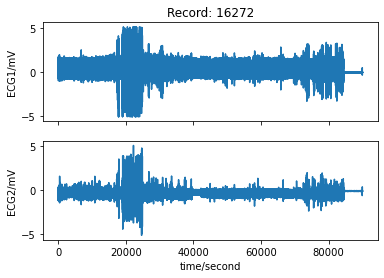

In [31]:

wfdb.plot_wfdb(pepito)

In [35]:

ListaDatos=[]
signal0=pepito.p_signal[:,0]



lista=[]
cont=0
primera=0
#lista=[1,2,3,4,5,6,7,8,9,10]
#print(lista[5:])

print(len(signal0))
for i in signal0[:1000000]:
    lista.append(i)
    
    
    if len(lista)==20:
        media=float(np.mean(lista))
            
        moda=float(s.mode(lista)[0])
        medianaAlta=float(statistics.median_high(lista))
            
        mediana=float(np.median(lista))
            
        kurtosis=np.std(lista)
            
        Desviacion=statistics.pstdev(lista)
        
        filaLatido=[media,moda,mediana, medianaAlta,kurtosis,Desviacion]
        #print(filaLatido)
        if primera==0:
            for j in range(0,20):
                ListaDatos.append(filaLatido)
            primera=1
        else:
            for j in range(0,10):
                ListaDatos.append(filaLatido)
            primera=1
            
        lista=lista[10:]
    #print(cont)
    cont+=1
        
    

11520000


In [36]:
resultado=clf.predict(ListaDatos)
DataFrameResultado= pd.DataFrame(resultado, columns =["Salida"])
DataFrameResultado

C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


,Salida
0,0
1,0
2,0
3,0
4,0
...,...
999995,1
999996,1
999997,1
999998,1


In [37]:
DataFrameSeñal0= pd.DataFrame(signal0[:1000000], columns =["Salida"])

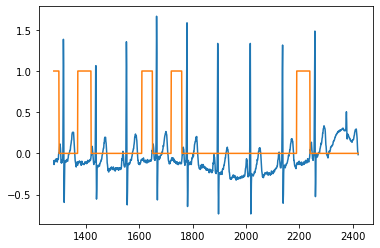

In [38]:
plt.plot(DataFrameSeñal0.loc[1280:2420])
plt.plot(DataFrameResultado.loc[1280:2420])

11354112


C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


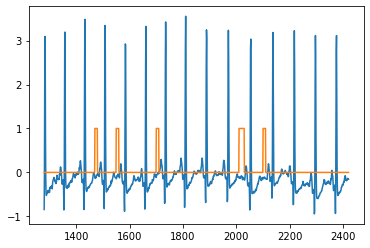

In [39]:
pepito=wfdb.rdrecord("C:/Users/andre/Downloads/content/" +listaDatos[2])
ListaDatos=[]
signal0=pepito.p_signal[:,0]



lista=[]
cont=0
primera=0
#lista=[1,2,3,4,5,6,7,8,9,10]
#print(lista[5:])

print(len(signal0))
for i in signal0[:1000000]:
    lista.append(i)
    
    
    if len(lista)==20:
        media=float(np.mean(lista))
            
        moda=float(s.mode(lista)[0])
            
        medianaAlta=float(statistics.median_high(lista))
            
        mediana=float(np.median(lista))
            
        kurtosis=np.std(lista)
            
        Desviacion=statistics.pstdev(lista)
        
        filaLatido=[media,moda,mediana, medianaAlta,kurtosis,Desviacion]
        #print(filaLatido)
        if primera==0:
            for j in range(0,20):
                ListaDatos.append(filaLatido)
            primera=1
        else:
            for j in range(0,10):
                ListaDatos.append(filaLatido)
            primera=1
            
        lista=lista[10:]
    #print(cont)
    cont+=1

resultado=clf.predict(ListaDatos)
DataFrameResultado= pd.DataFrame(resultado, columns =["Salida"])
DataFrameResultado
DataFrameSeñal0= pd.DataFrame(signal0[:1000000], columns =["Salida"])
plt.plot(DataFrameSeñal0.loc[1280:2420])
plt.plot(DataFrameResultado.loc[1280:2420])

11051008


C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


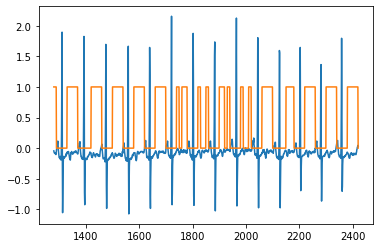

In [40]:
pepito=wfdb.rdrecord("C:/Users/andre/Downloads/content/" +listaDatos[3])
ListaDatos=[]
signal0=pepito.p_signal[:,0]



lista=[]
cont=0
primera=0
#lista=[1,2,3,4,5,6,7,8,9,10]
#print(lista[5:])

print(len(signal0))
for i in signal0[:1000000]:
    lista.append(i)
    
    
    if len(lista)==20:
        media=float(np.mean(lista))
            
        moda=float(s.mode(lista)[0])
            
        medianaAlta=float(statistics.median_high(lista))
            
        mediana=float(np.median(lista))
            
        kurtosis=np.std(lista)
            
        Desviacion=statistics.pstdev(lista)
        
        filaLatido=[media,moda,mediana, medianaAlta,kurtosis,Desviacion]
        #print(filaLatido)
        if primera==0:
            for j in range(0,20):
                ListaDatos.append(filaLatido)
            primera=1
        else:
            for j in range(0,10):
                ListaDatos.append(filaLatido)
            primera=1
            
        lista=lista[10:]
    #print(cont)
    cont+=1
resultado=clf.predict(ListaDatos)
DataFrameResultado= pd.DataFrame(resultado, columns =["Salida"])
DataFrameResultado
DataFrameSeñal0= pd.DataFrame(signal0[:1000000], columns =["Salida"])
plt.plot(DataFrameSeñal0.loc[1280:2420])
plt.plot(DataFrameResultado.loc[1280:2420])

11960320


C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


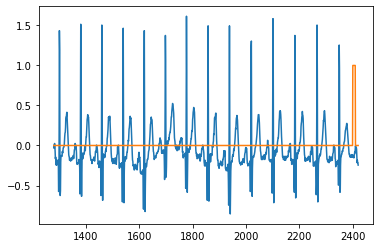

In [41]:
pepito=wfdb.rdrecord("C:/Users/andre/Downloads/content/" +listaDatos[4])
ListaDatos=[]
signal0=pepito.p_signal[:,0]



lista=[]
cont=0
primera=0
#lista=[1,2,3,4,5,6,7,8,9,10]
#print(lista[5:])

print(len(signal0))
for i in signal0[:1000000]:
    lista.append(i)
    
    
    if len(lista)==20:
        media=float(np.mean(lista))
            
        moda=float(s.mode(lista)[0])
            
        medianaAlta=float(statistics.median_high(lista))
            
        mediana=float(np.median(lista))
            
        kurtosis=np.std(lista)
            
        Desviacion=statistics.pstdev(lista)
        
        filaLatido=[media,moda,mediana, medianaAlta,kurtosis,Desviacion]
        #print(filaLatido)
        if primera==0:
            for j in range(0,20):
                ListaDatos.append(filaLatido)
            primera=1
        else:
            for j in range(0,10):
                ListaDatos.append(filaLatido)
            primera=1
            
        lista=lista[10:]
    #print(cont)
    cont+=1
resultado=clf.predict(ListaDatos)
DataFrameResultado= pd.DataFrame(resultado, columns =["Salida"])
DataFrameResultado
DataFrameSeñal0= pd.DataFrame(signal0[:1000000], columns =["Salida"])
plt.plot(DataFrameSeñal0.loc[1280:2420])
plt.plot(DataFrameResultado.loc[1280:2420])

11327488


C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


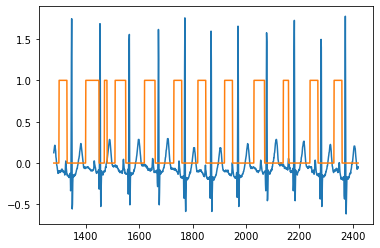

In [42]:
pepito=wfdb.rdrecord("C:/Users/andre/Downloads/content/" +listaDatos[5])
ListaDatos=[]
signal0=pepito.p_signal[:,0]



lista=[]
cont=0
primera=0
#lista=[1,2,3,4,5,6,7,8,9,10]
#print(lista[5:])

print(len(signal0))
for i in signal0[:1000000]:
    lista.append(i)
    
    
    if len(lista)==20:
        media=float(np.mean(lista))
            
        moda=float(s.mode(lista)[0])
            
        medianaAlta=float(statistics.median_high(lista))
            
        mediana=float(np.median(lista))
            
        kurtosis=np.std(lista)
            
        Desviacion=statistics.pstdev(lista)
        
        filaLatido=[media,moda,mediana, medianaAlta,kurtosis,Desviacion]
        #print(filaLatido)
        if primera==0:
            for j in range(0,20):
                ListaDatos.append(filaLatido)
            primera=1
        else:
            for j in range(0,10):
                ListaDatos.append(filaLatido)
            primera=1
            
        lista=lista[10:]
    #print(cont)
    cont+=1
resultado=clf.predict(ListaDatos)
DataFrameResultado= pd.DataFrame(resultado, columns =["Salida"])
DataFrameResultado
DataFrameSeñal0= pd.DataFrame(signal0[:1000000], columns =["Salida"])
plt.plot(DataFrameSeñal0.loc[1280:2420])
plt.plot(DataFrameResultado.loc[1280:2420])

11046912


C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


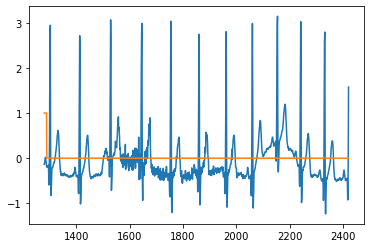

In [43]:
pepito=wfdb.rdrecord("C:/Users/andre/Downloads/content/" +listaDatos[6])
ListaDatos=[]
signal0=pepito.p_signal[:,0]



lista=[]
cont=0
primera=0
#lista=[1,2,3,4,5,6,7,8,9,10]
#print(lista[5:])

print(len(signal0))
for i in signal0[:1000000]:
    lista.append(i)
    
    
    if len(lista)==20:
        media=float(np.mean(lista))
            
        moda=float(s.mode(lista)[0])
            
        medianaAlta=float(statistics.median_high(lista))
            
        mediana=float(np.median(lista))
            
        kurtosis=np.std(lista)
            
        Desviacion=statistics.pstdev(lista)
        
        filaLatido=[media,moda,mediana ,medianaAlta,kurtosis,Desviacion]
        #print(filaLatido)
        if primera==0:
            for j in range(0,20):
                ListaDatos.append(filaLatido)
            primera=1
        else:
            for j in range(0,10):
                ListaDatos.append(filaLatido)
            primera=1
            
        lista=lista[10:]
    #print(cont)
    cont+=1
resultado=clf.predict(ListaDatos)
DataFrameResultado= pd.DataFrame(resultado, columns =["Salida"])
DataFrameResultado
DataFrameSeñal0= pd.DataFrame(signal0[:1000000], columns =["Salida"])
plt.plot(DataFrameSeñal0.loc[1280:2420])
plt.plot(DataFrameResultado.loc[1280:2420])

11284480


C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


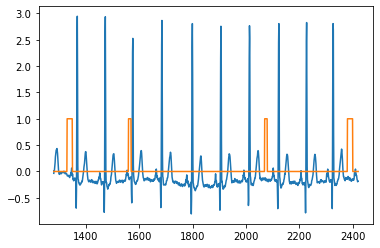

In [44]:
pepito=wfdb.rdrecord("C:/Users/andre/Downloads/content/" +listaDatos[7])
ListaDatos=[]
signal0=pepito.p_signal[:,0]



lista=[]
cont=0
primera=0
#lista=[1,2,3,4,5,6,7,8,9,10]
#print(lista[5:])

print(len(signal0))
for i in signal0[:1000000]:
    lista.append(i)
    
    
    if len(lista)==20:
        media=float(np.mean(lista))
            
        moda=float(s.mode(lista)[0])
            
        medianaAlta=float(statistics.median_high(lista))
            
        mediana=float(np.median(lista))
            
        kurtosis=np.std(lista)
            
        Desviacion=statistics.pstdev(lista)
        
        filaLatido=[media,moda,mediana, medianaAlta,kurtosis,Desviacion]
        #print(filaLatido)
        if primera==0:
            for j in range(0,20):
                ListaDatos.append(filaLatido)
            primera=1
        else:
            for j in range(0,10):
                ListaDatos.append(filaLatido)
            primera=1
            
        lista=lista[10:]
    #print(cont)
    cont+=1
resultado=clf.predict(ListaDatos)
DataFrameResultado= pd.DataFrame(resultado, columns =["Salida"])
DataFrameResultado
DataFrameSeñal0= pd.DataFrame(signal0[:1000000], columns =["Salida"])
plt.plot(DataFrameSeñal0.loc[1280:2420])
plt.plot(DataFrameResultado.loc[1280:2420])

10866688


C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


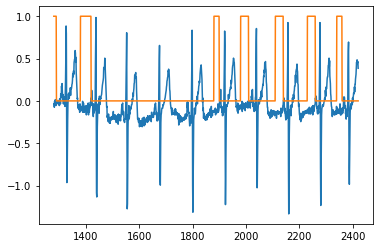

In [45]:
pepito=wfdb.rdrecord("C:/Users/andre/Downloads/content/" +listaDatos[8])
ListaDatos=[]
signal0=pepito.p_signal[:,0]



lista=[]
cont=0
primera=0
#lista=[1,2,3,4,5,6,7,8,9,10]
#print(lista[5:])

print(len(signal0))
for i in signal0[:1000000]:
    lista.append(i)
    
    
    if len(lista)==20:
        media=float(np.mean(lista))
            
        moda=float(s.mode(lista)[0])
            
        medianaAlta=float(statistics.median_high(lista))
            
        mediana=float(np.median(lista))
            
        kurtosis=np.std(lista)
            
        Desviacion=statistics.pstdev(lista)
        
        filaLatido=[media,moda,mediana, medianaAlta,kurtosis,Desviacion]
        #print(filaLatido)
        if primera==0:
            for j in range(0,20):
                ListaDatos.append(filaLatido)
            primera=1
        else:
            for j in range(0,10):
                ListaDatos.append(filaLatido)
            primera=1
            
        lista=lista[10:]
    #print(cont)
    cont+=1
resultado=clf.predict(ListaDatos)
DataFrameResultado= pd.DataFrame(resultado, columns =["Salida"])
DataFrameResultado
DataFrameSeñal0= pd.DataFrame(signal0[:1000000], columns =["Salida"])
plt.plot(DataFrameSeñal0.loc[1280:2420])
plt.plot(DataFrameResultado.loc[1280:2420])

10659840


C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


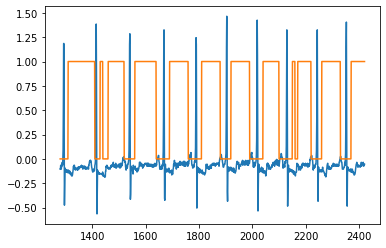

In [46]:
pepito=wfdb.rdrecord("C:/Users/andre/Downloads/content/" +listaDatos[9])
ListaDatos=[]
signal0=pepito.p_signal[:,0]



lista=[]
cont=0
primera=0
#lista=[1,2,3,4,5,6,7,8,9,10]
#print(lista[5:])

print(len(signal0))
for i in signal0[:1000000]:
    lista.append(i)
    
    
    if len(lista)==20:
        media=float(np.mean(lista))
            
        moda=float(s.mode(lista)[0])
            
        medianaAlta=float(statistics.median_high(lista))
            
        mediana=float(np.median(lista))
            
        kurtosis=np.std(lista)
            
        Desviacion=statistics.pstdev(lista)
        
        filaLatido=[media,moda,mediana, medianaAlta,kurtosis,Desviacion]
        #print(filaLatido)
        if primera==0:
            for j in range(0,20):
                ListaDatos.append(filaLatido)
            primera=1
        else:
            for j in range(0,10):
                ListaDatos.append(filaLatido)
            primera=1
            
        lista=lista[10:]
    #print(cont)
    cont+=1
resultado=clf.predict(ListaDatos)
DataFrameResultado= pd.DataFrame(resultado, columns =["Salida"])
DataFrameResultado
DataFrameSeñal0= pd.DataFrame(signal0[:1000000], columns =["Salida"])
plt.plot(DataFrameSeñal0.loc[1280:2420])
plt.plot(DataFrameResultado.loc[1280:2420])

11235328


C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


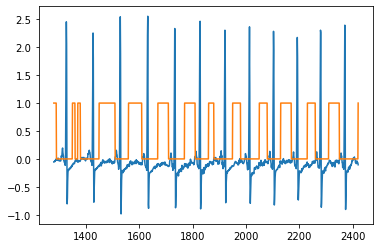

In [47]:
pepito=wfdb.rdrecord("C:/Users/andre/Downloads/content/" +listaDatos[10])
ListaDatos=[]
signal0=pepito.p_signal[:,0]



lista=[]
cont=0
primera=0
#lista=[1,2,3,4,5,6,7,8,9,10]
#print(lista[5:])

print(len(signal0))
for i in signal0[:1000000]:
    lista.append(i)
    
    
    if len(lista)==20:
        media=float(np.mean(lista))
            
        moda=float(s.mode(lista)[0])
            
        medianaAlta=float(statistics.median_high(lista))
            
        mediana=float(np.median(lista))
            
        kurtosis=np.std(lista)
            
        Desviacion=statistics.pstdev(lista)
        
        filaLatido=[media,moda,mediana, medianaAlta,kurtosis,Desviacion]
        #print(filaLatido)
        if primera==0:
            for j in range(0,20):
                ListaDatos.append(filaLatido)
            primera=1
        else:
            for j in range(0,10):
                ListaDatos.append(filaLatido)
            primera=1
            
        lista=lista[10:]
    #print(cont)
    cont+=1
resultado=clf.predict(ListaDatos)
DataFrameResultado= pd.DataFrame(resultado, columns =["Salida"])
DataFrameResultado
DataFrameSeñal0= pd.DataFrame(signal0[:1000000], columns =["Salida"])
plt.plot(DataFrameSeñal0.loc[1280:2420])
plt.plot(DataFrameResultado.loc[1280:2420])

11960320


C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


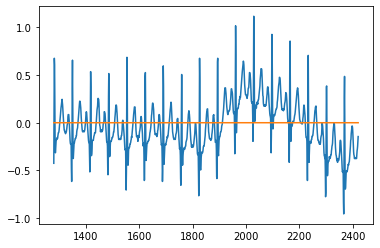

In [48]:
pepito=wfdb.rdrecord("C:/Users/andre/Downloads/content/" +listaDatos[11])
ListaDatos=[]
signal0=pepito.p_signal[:,0]



lista=[]
cont=0
primera=0
#lista=[1,2,3,4,5,6,7,8,9,10]
#print(lista[5:])

print(len(signal0))
for i in signal0[:1000000]:
    lista.append(i)
    
    
    if len(lista)==20:
        media=float(np.mean(lista))
            
        moda=float(s.mode(lista)[0])
            
        medianaAlta=float(statistics.median_high(lista))
            
        mediana=float(np.median(lista))
            
        kurtosis=np.std(lista)
            
        Desviacion=statistics.pstdev(lista)
        
        filaLatido=[media,moda,mediana ,medianaAlta,kurtosis,Desviacion]
        #print(filaLatido)
        if primera==0:
            for j in range(0,20):
                ListaDatos.append(filaLatido)
            primera=1
        else:
            for j in range(0,10):
                ListaDatos.append(filaLatido)
            primera=1
            
        lista=lista[10:]
    #print(cont)
    cont+=1
resultado=clf.predict(ListaDatos)
DataFrameResultado= pd.DataFrame(resultado, columns =["Salida"])
DataFrameResultado
DataFrameSeñal0= pd.DataFrame(signal0[:1000000], columns =["Salida"])
plt.plot(DataFrameSeñal0.loc[1280:2420])
plt.plot(DataFrameResultado.loc[1280:2420])

10942464


C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


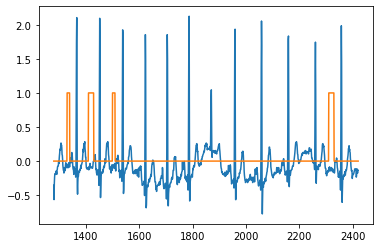

In [49]:
pepito=wfdb.rdrecord("C:/Users/andre/Downloads/content/" +listaDatos[12])
ListaDatos=[]
signal0=pepito.p_signal[:,0]



lista=[]
cont=0
primera=0
#lista=[1,2,3,4,5,6,7,8,9,10]
#print(lista[5:])

print(len(signal0))
for i in signal0[:1000000]:
    lista.append(i)
    
    
    if len(lista)==20:
        media=float(np.mean(lista))
            
        moda=float(s.mode(lista)[0])
            
        medianaAlta=float(statistics.median_high(lista))
            
        mediana=float(np.median(lista))
            
        kurtosis=np.std(lista)
            
        Desviacion=statistics.pstdev(lista)
        
        filaLatido=[media,moda,mediana ,medianaAlta,kurtosis,Desviacion]
        #print(filaLatido)
        if primera==0:
            for j in range(0,20):
                ListaDatos.append(filaLatido)
            primera=1
        else:
            for j in range(0,10):
                ListaDatos.append(filaLatido)
            primera=1
            
        lista=lista[10:]
    #print(cont)
    cont+=1
resultado=clf.predict(ListaDatos)
DataFrameResultado= pd.DataFrame(resultado, columns =["Salida"])
DataFrameResultado
DataFrameSeñal0= pd.DataFrame(signal0[:1000000], columns =["Salida"])
plt.plot(DataFrameSeñal0.loc[1280:2420])
plt.plot(DataFrameResultado.loc[1280:2420])

10967040


C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


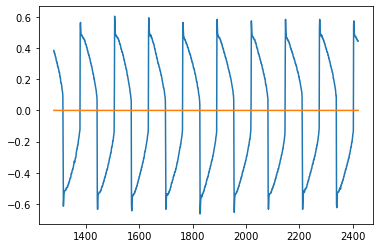

In [50]:
pepito=wfdb.rdrecord("C:/Users/andre/Downloads/content/" +listaDatos[13])
ListaDatos=[]
signal0=pepito.p_signal[:,0]



lista=[]
cont=0
primera=0
#lista=[1,2,3,4,5,6,7,8,9,10]
#print(lista[5:])

print(len(signal0))
for i in signal0[:1000000]:
    lista.append(i)
    
    
    if len(lista)==20:
        media=float(np.mean(lista))
            
        moda=float(s.mode(lista)[0])
            
        medianaAlta=float(statistics.median_high(lista))
            
        mediana=float(np.median(lista))
            
        kurtosis=np.std(lista)
            
        Desviacion=statistics.pstdev(lista)
        
        filaLatido=[media,moda,mediana ,medianaAlta,kurtosis,Desviacion]
        #print(filaLatido)
        if primera==0:
            for j in range(0,20):
                ListaDatos.append(filaLatido)
            primera=1
        else:
            for j in range(0,10):
                ListaDatos.append(filaLatido)
            primera=1
            
        lista=lista[10:]
    #print(cont)
    cont+=1
resultado=clf.predict(ListaDatos)
DataFrameResultado= pd.DataFrame(resultado, columns =["Salida"])
DataFrameResultado
DataFrameSeñal0= pd.DataFrame(signal0[:1000000], columns =["Salida"])
plt.plot(DataFrameSeñal0.loc[1280:2420])
plt.plot(DataFrameResultado.loc[1280:2420])

11143168


C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


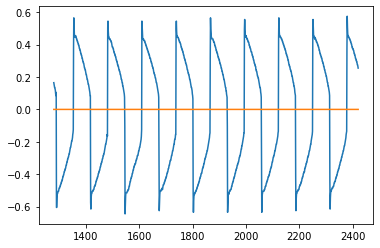

In [51]:
pepito=wfdb.rdrecord("C:/Users/andre/Downloads/content/" +listaDatos[14])
ListaDatos=[]
signal0=pepito.p_signal[:,0]



lista=[]
cont=0
primera=0
#lista=[1,2,3,4,5,6,7,8,9,10]
#print(lista[5:])

print(len(signal0))
for i in signal0[:1000000]:
    lista.append(i)
    
    
    if len(lista)==20:
        media=float(np.mean(lista))
            
        moda=float(s.mode(lista)[0])
            
        medianaAlta=float(statistics.median_high(lista))
            
        mediana=float(np.median(lista))
            
        kurtosis=np.std(lista)
            
        Desviacion=statistics.pstdev(lista)
        
        filaLatido=[media,moda,mediana, medianaAlta,kurtosis,Desviacion]
        #print(filaLatido)
        if primera==0:
            for j in range(0,20):
                ListaDatos.append(filaLatido)
            primera=1
        else:
            for j in range(0,10):
                ListaDatos.append(filaLatido)
            primera=1
            
        lista=lista[10:]
    #print(cont)
    cont+=1
resultado=clf.predict(ListaDatos)
DataFrameResultado= pd.DataFrame(resultado, columns =["Salida"])
DataFrameResultado
DataFrameSeñal0= pd.DataFrame(signal0[:1000000], columns =["Salida"])
plt.plot(DataFrameSeñal0.loc[1280:2420])
plt.plot(DataFrameResultado.loc[1280:2420])

10705920


C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


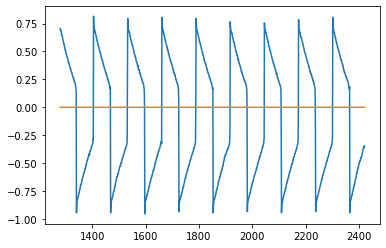

In [52]:
pepito=wfdb.rdrecord("C:/Users/andre/Downloads/content/" +listaDatos[15])
ListaDatos=[]
signal0=pepito.p_signal[:,0]



lista=[]
cont=0
primera=0
#lista=[1,2,3,4,5,6,7,8,9,10]
#print(lista[5:])

print(len(signal0))
for i in signal0[:1000000]:
    lista.append(i)
    
    
    if len(lista)==20:
        media=float(np.mean(lista))
            
        moda=float(s.mode(lista)[0])
            
        medianaAlta=float(statistics.median_high(lista))
            
        mediana=float(np.median(lista))
            
        kurtosis=np.std(lista)
            
        Desviacion=statistics.pstdev(lista)
        
        filaLatido=[media,moda,mediana, medianaAlta,kurtosis,Desviacion]
        #print(filaLatido)
        if primera==0:
            for j in range(0,20):
                ListaDatos.append(filaLatido)
            primera=1
        else:
            for j in range(0,10):
                ListaDatos.append(filaLatido)
            primera=1
            
        lista=lista[10:]
    #print(cont)
    cont+=1
resultado=clf.predict(ListaDatos)
DataFrameResultado= pd.DataFrame(resultado, columns =["Salida"])
DataFrameResultado
DataFrameSeñal0= pd.DataFrame(signal0[:1000000], columns =["Salida"])
plt.plot(DataFrameSeñal0.loc[1280:2420])
plt.plot(DataFrameResultado.loc[1280:2420])

11139072


C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


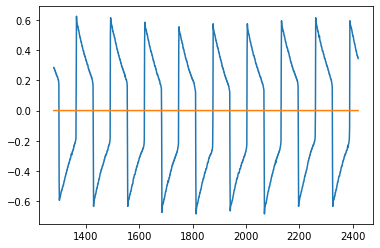

In [53]:
pepito=wfdb.rdrecord("C:/Users/andre/Downloads/content/" +listaDatos[16])
ListaDatos=[]
signal0=pepito.p_signal[:,0]



lista=[]
cont=0
primera=0
#lista=[1,2,3,4,5,6,7,8,9,10]
#print(lista[5:])

print(len(signal0))
for i in signal0[:1000000]:
    lista.append(i)
    
    
    if len(lista)==20:
        media=float(np.mean(lista))
            
        moda=float(s.mode(lista)[0])
            
        medianaAlta=float(statistics.median_high(lista))
            
        mediana=float(np.median(lista))
            
        kurtosis=np.std(lista)
            
        Desviacion=statistics.pstdev(lista)
        
        filaLatido=[media,moda,mediana, medianaAlta,kurtosis,Desviacion]
        #print(filaLatido)
        if primera==0:
            for j in range(0,20):
                ListaDatos.append(filaLatido)
            primera=1
        else:
            for j in range(0,10):
                ListaDatos.append(filaLatido)
            primera=1
            
        lista=lista[10:]
    #print(cont)
    cont+=1
resultado=clf.predict(ListaDatos)
DataFrameResultado= pd.DataFrame(resultado, columns =["Salida"])
DataFrameResultado
DataFrameSeñal0= pd.DataFrame(signal0[:1000000], columns =["Salida"])
plt.plot(DataFrameSeñal0.loc[1280:2420])
plt.plot(DataFrameResultado.loc[1280:2420])

10701824


C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


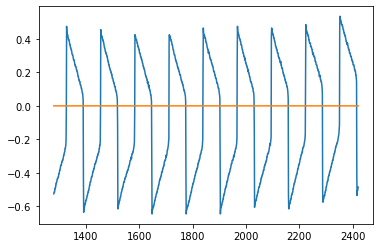

In [54]:
pepito=wfdb.rdrecord("C:/Users/andre/Downloads/content/" +listaDatos[17])
ListaDatos=[]
signal0=pepito.p_signal[:,0]



lista=[]
cont=0
primera=0
#lista=[1,2,3,4,5,6,7,8,9,10]
#print(lista[5:])

print(len(signal0))
for i in signal0[:1000000]:
    lista.append(i)
    
    
    if len(lista)==20:
        media=float(np.mean(lista))
            
        moda=float(s.mode(lista)[0])
            
        medianaAlta=float(statistics.median_high(lista))
            
        mediana=float(np.median(lista))
            
        kurtosis=np.std(lista)
            
        Desviacion=statistics.pstdev(lista)
        
        filaLatido=[media,moda,mediana, medianaAlta,kurtosis,Desviacion]
        #print(filaLatido)
        if primera==0:
            for j in range(0,20):
                ListaDatos.append(filaLatido)
            primera=1
        else:
            for j in range(0,10):
                ListaDatos.append(filaLatido)
            primera=1
            
        lista=lista[10:]
    #print(cont)
    cont+=1
resultado=clf.predict(ListaDatos)
DataFrameResultado= pd.DataFrame(resultado, columns =["Salida"])
DataFrameResultado
DataFrameSeñal0= pd.DataFrame(signal0[:1000000], columns =["Salida"])
plt.plot(DataFrameSeñal0.loc[1280:2420])
plt.plot(DataFrameResultado.loc[1280:2420])

# ¿Qué problemas puedes observar usando únicamente la gráfica

### El mayor problema que se puede observar de la grafica, es que, como tal no se superpone exactamente en la señal, esta un poco corrida, o no esta exactamente donde es, pero si alcanza a tocar la señal en la mayoria de sus osilaciones, aunque hay casos excepcionales donde no existe la grafica en el latido. Tambien se puede tener en cuenta que puede que ocurran falsos positivos, que son aquellas parte de la grafica que como tal estan en 1, pero no son un latido, al igual que los faltos positivos, que son, pero el sistema detectan que no lo son, que seria cuando la grafica se hace constante en 0 cuando hay latido

# ¿Por qué se puede deber eso?
### Si bien, tenemos que entender que entrenamos la IA con no solo una señal, si no que con un monton de señales que no son constantes, y que ademas, pueden tener anomalias cardiacas que, a la hora del entrenamiento, la IA no puede diferenciar, por ende, puede que dicha alomania al salir tanto del espectro, no se clasifique como latido, de paso, debemos trabajar lo de los falsos negativos y positivos, para aumentar la precision en las predicciones

# Mencione una estrategia que puedas utilizar o implementar para mejorarlo.
### Una estrategia que se puede  usar para mejorar, tal vez, es usar los datos de la pendiente de la señal, o puede que, aumentando la cantidad de casos de los datos pueda mejorar (Lo cual si hace, y se puede demostrar con otro codigo extra que se anexo en donde se hace el entrenamiento con todo el data set, donde hay casi un total de 4m de datos, si quiere puede observarlo). Otra que se puede realizar, es en cierta manera, es tomar otro tipo de IA que no dependa tanto de la medida del dato, si no de como es su comportamiento en si, en vez de aprender atra vez de medidas unitarias, deberia aprender de medidas mas de comportamiento